In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
adult_data  = pd.read_csv('./datasets/adult/adult.csv')
adult_data.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [3]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
adult_data.isnull().sum()
# no nulls, no need to clean

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df = pd.DataFrame(adult_data)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [7]:
# Convert columns to categorical instead of 'object'
categorical_columns = ['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income'] 

for col in categorical_columns:
    df[col] = df[col].astype('category')

df.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
 14  income           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [8]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               0   
1   38          4   89814         11                9               1   
2   28          2  336951          7               12               1   
3   44          4  160323         15               10               1   
4   18          0  103497         15               10               0   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39       0  
2              40              39       1  
3              40              39       1  
4              30              39       0

In [9]:
df.drop(columns=['fnlwgt'], inplace=True)
df.head()

age  workclass  education  educational-num  marital-status  occupation  \
0   25          4          1                7               0           7   
1   38          4         11                9               1           5   
2   28          2          7               12               1          11   
3   44          4         15               10               1           7   
4   18          0         15               10               0           0   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0             3     2       1             0             0              40   
1             0     4       1             0             0              50   
2             0     4       1             0             0              40   
3             0     2       1          7688             0              40   
4             3     4       0             0             0              30   

   native-country  income  
0              39       0  
1              39       0  
2              39       1  
3              39       1  
4              39       0

In [14]:
df.info()
print()
desc = df.describe()
desc.to_latex("./pickles/latex/adult_description.tex", index=True)
desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int8 
 2   education        48842 non-null  int8 
 3   educational-num  48842 non-null  int64
 4   marital-status   48842 non-null  int8 
 5   occupation       48842 non-null  int8 
 6   relationship     48842 non-null  int8 
 7   race             48842 non-null  int8 
 8   gender           48842 non-null  int8 
 9   capital-gain     48842 non-null  int64
 10  capital-loss     48842 non-null  int64
 11  hours-per-week   48842 non-null  int64
 12  native-country   48842 non-null  int8 
 13  income           48842 non-null  int8 
dtypes: int64(5), int8(9)
memory usage: 2.3 MB



age     workclass     education  educational-num  \
count  48842.000000  48842.000000  48842.000000     48842.000000   
mean      38.643585      3.870439     10.288420        10.078089   
std       13.710510      1.464234      3.874492         2.570973   
min       17.000000      0.000000      0.000000         1.000000   
25%       28.000000      4.000000      9.000000         9.000000   
50%       37.000000      4.000000     11.000000        10.000000   
75%       48.000000      4.000000     12.000000        12.000000   
max       90.000000      8.000000     15.000000        16.000000   

       marital-status    occupation  relationship          race        gender  \
count    48842.000000  48842.000000  48842.000000  48842.000000  48842.000000   
mean         0.471807      6.577700      1.443287      3.668052      0.668482   
std          0.499210      4.230509      1.602151      0.845986      0.470764   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      3.000000      0.000000      4.000000      0.000000   
50%          0.000000      7.000000      1.000000      4.000000      1.000000   
75%          1.000000     10.000000      3.000000      4.000000      1.000000   
max          1.000000     14.000000      5.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week  native-country  \
count  48842.000000  48842.000000    48842.000000    48842.000000   
mean    1079.067626     87.502314       40.422382       36.749355   
std     7452.019058    403.004552       12.391444        7.775343   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       39.000000   
50%        0.000000      0.000000       40.000000       39.000000   
75%        0.000000      0.000000       45.000000       39.000000   
max    99999.000000   4356.000000       99.000000       41.000000   

             income  
count  48842.000000  
mean       0.239282  
std        0.426649  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [50]:
df.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

<AxesSubplot:xlabel='education'>

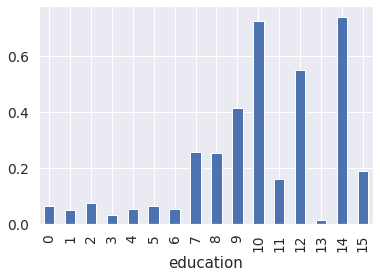

In [51]:
df.groupby('education').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

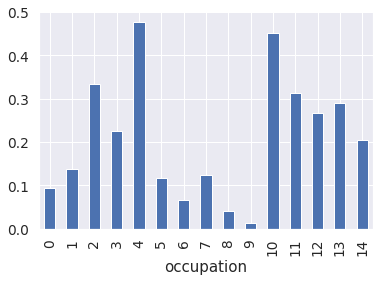

In [52]:
df.groupby('occupation').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

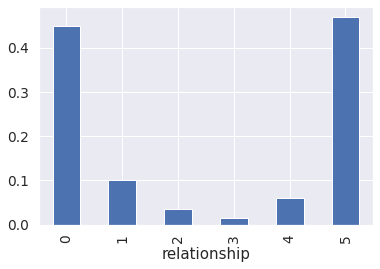

In [53]:
df.groupby('relationship').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

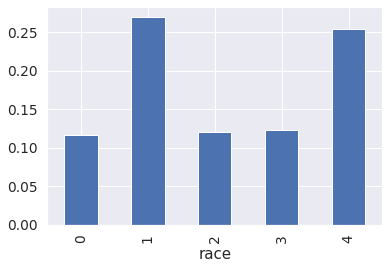

In [54]:
df.groupby('race').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

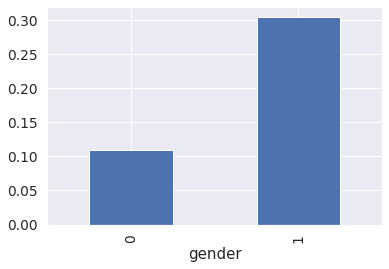

In [55]:
df.groupby('gender').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

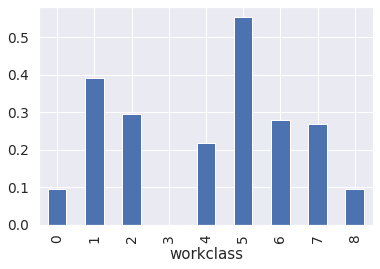

In [56]:
df.groupby('workclass').income.mean().plot(kind='bar')

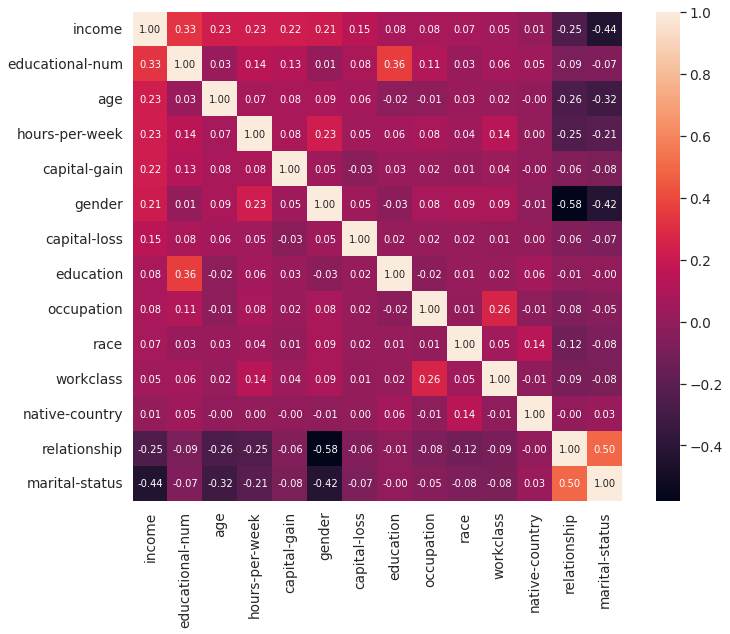

In [57]:
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

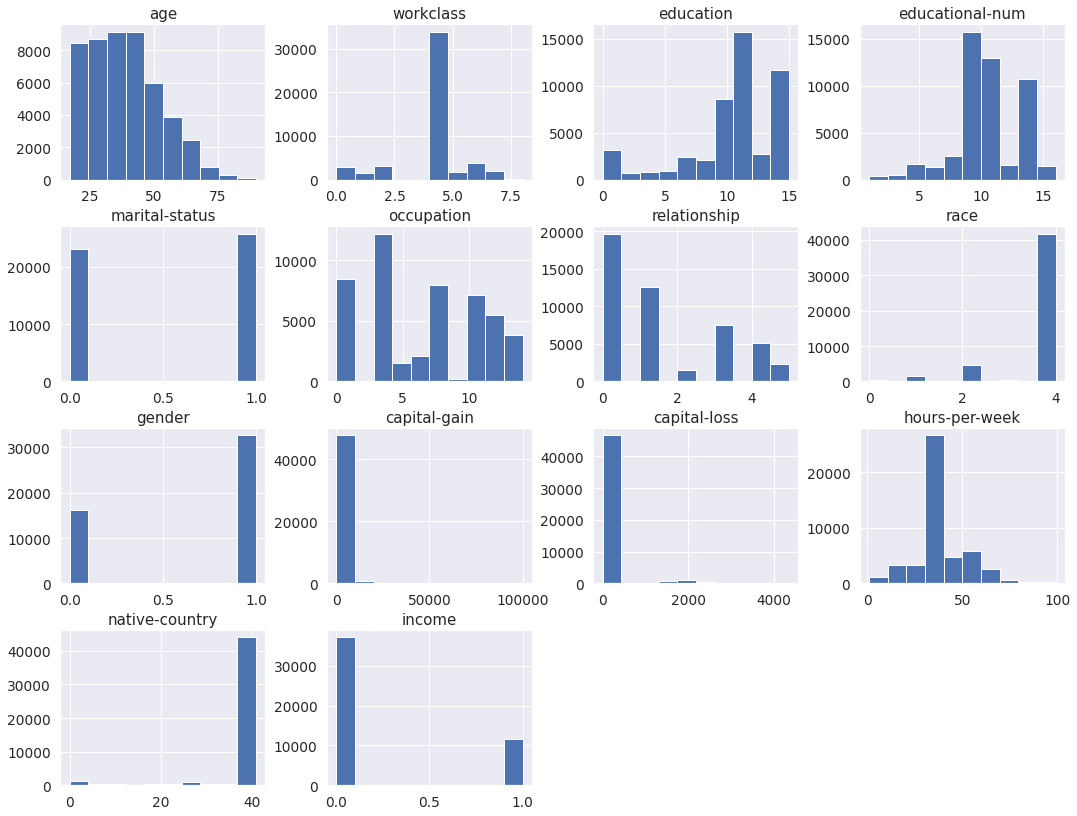

In [58]:
df.hist(figsize=(18,14))
pplt.show()

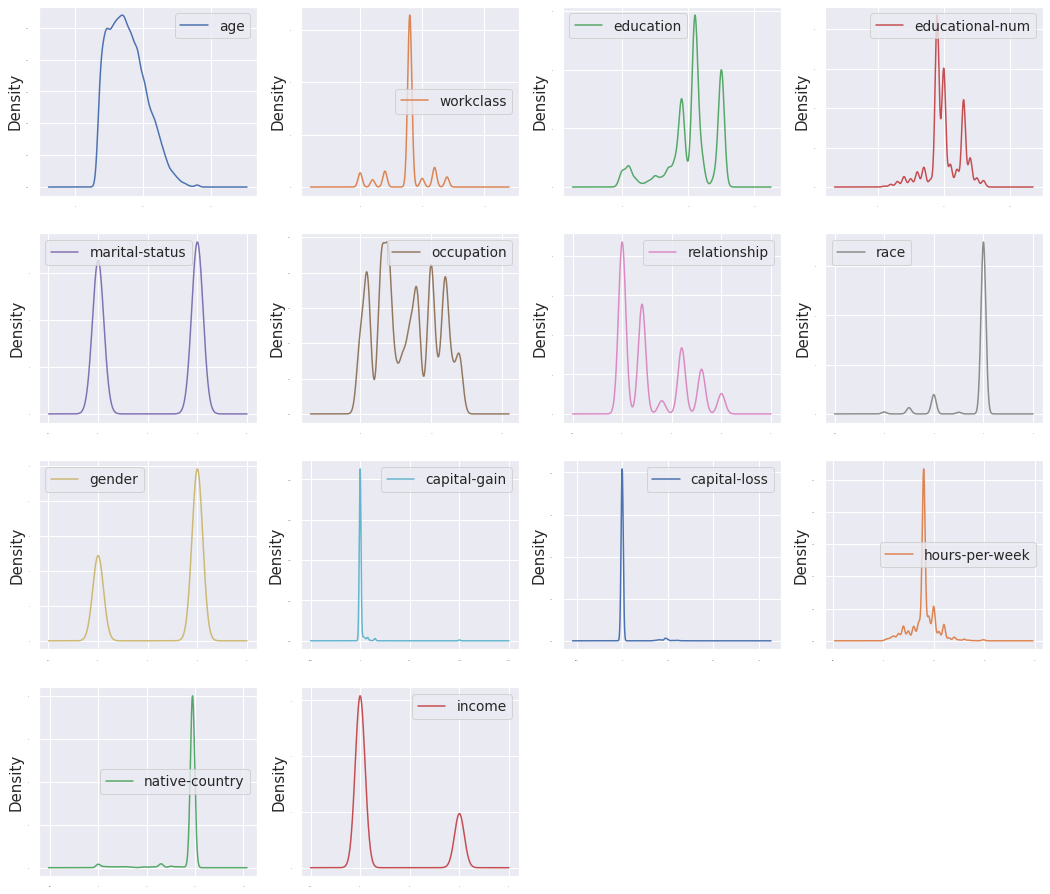

In [62]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(18,16))
pplt.show()

In [63]:
cols = df.columns
cols = cols.drop(labels="income")
df_x = pd.DataFrame(df, columns=cols)
df_y = pd.DataFrame(df, columns=["income"])

In [64]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
#Train our model with the training data
reg.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32724, 13)
(16118, 13)
(32724, 1)
(16118, 1)


In [66]:
#print our price predictions on our test data
y_pred = reg.predict(x_test)

In [67]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [68]:
#confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11817,   499],
       [ 2554,  1248]])

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8105844397567936


In [70]:
# evaluate the algorithm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 1337

# split the whole dataset into folds
kfold = KFold(n_splits, random_state=seed, shuffle=True)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'
# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(reg,df_x,df_y, cv=kfold, scoring=scoring)
# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation

print("Accuracy: %.6f (%.6f)" % (results.mean(), results.std()))     # Mean and Std of results

Accuracy: 0.807666 (0.003966)


In [71]:
logit_model=sm.Logit(df_y,df_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.367522
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.332     
Dependent Variable: income           AIC:              35927.0040
Date:               2022-05-18 13:47 BIC:              36041.3565
No. Observations:   48842            Log-Likelihood:   -17951.   
Df Model:           12               LL-Null:          -26875.   
Df Residuals:       48829            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0009   0.0010   0.9438 0.3453 -0.0010  0.0029
workclass        -0.1314   0.0091 -14.4104 0.0000 -0.1493 -0.1136


In [77]:
df.to_csv('./datasets/adult/adult-preprocessed.csv', index_label="index")